# Data Preprocessing:

1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
file_path = '/content/EastWestAirlines.xlsx'
xls = pd.ExcelFile(file_path)

xls.sheet_names

['Description', 'data']

In [ ]:
df = pd.read_excel(xls, 'Description')

In [ ]:
df.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [ ]:
data_df=pd.read_excel(xls,'data')
data_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
data_df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [ ]:
df.isnull().sum()

,0
East-West Airlines is trying to learn more about its customers. Key issues are their,8
Unnamed: 1,13
Unnamed: 2,20
Unnamed: 3,13
Unnamed: 4,8


In [ ]:
data_df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
df.describe()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,18,13,6,13,18
unique,18,3,3,3,18
top,"flying patterns, earning and use of frequent f...",NUMBER,1,Raw,Description
freq,1,9,3,9,1


In [ ]:
df[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']] = df[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].fillna("NaN")


In [ ]:
df

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [ ]:
df.isnull().sum()

,0
East-West Airlines is trying to learn more about its customers. Key issues are their,8
Unnamed: 1,0
Unnamed: 2,0
Unnamed: 3,0
Unnamed: 4,0


In [ ]:
numeric_columns = ['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4']


In [ ]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
df.dropna(inplace=True)


In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])


In [ ]:
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
df_filtered = df[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df = df_filtered

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df)

   East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0   flying patterns, earning and use of frequent f...                                      
1   card.  The task is to identify customer segmen...                                      
4   Source: Based upon real business data; company...                                      
5              (c) 2016 Galit Shmueli and Peter Bruce                                      
8                                          Field Name                                      
9                                                 ID#                                      
10                                            Balance                                      
11                                         Qual_miles                                      
12                                          cc1_miles                                      
13                                          cc2_miles                           

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df.drop(columns=['ID#', 'Award?']))


In [74]:
scaled_data = scaler.fit_transform(df[numeric_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


2.Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.


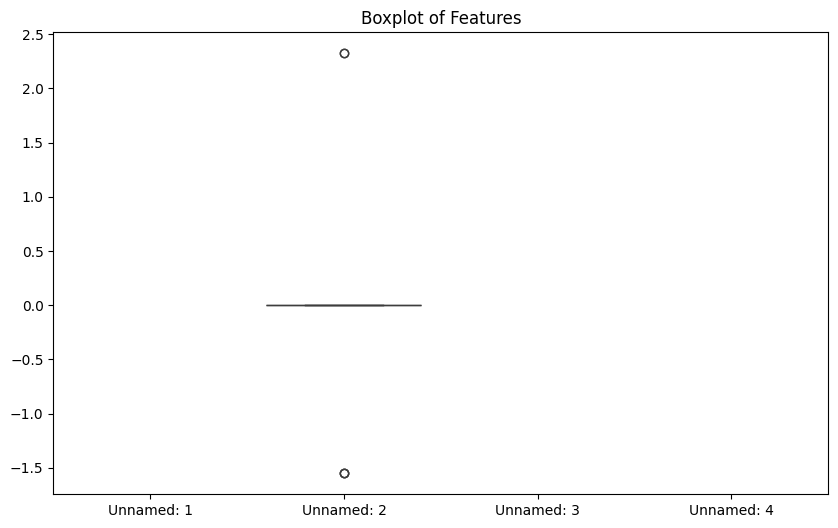

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.show()


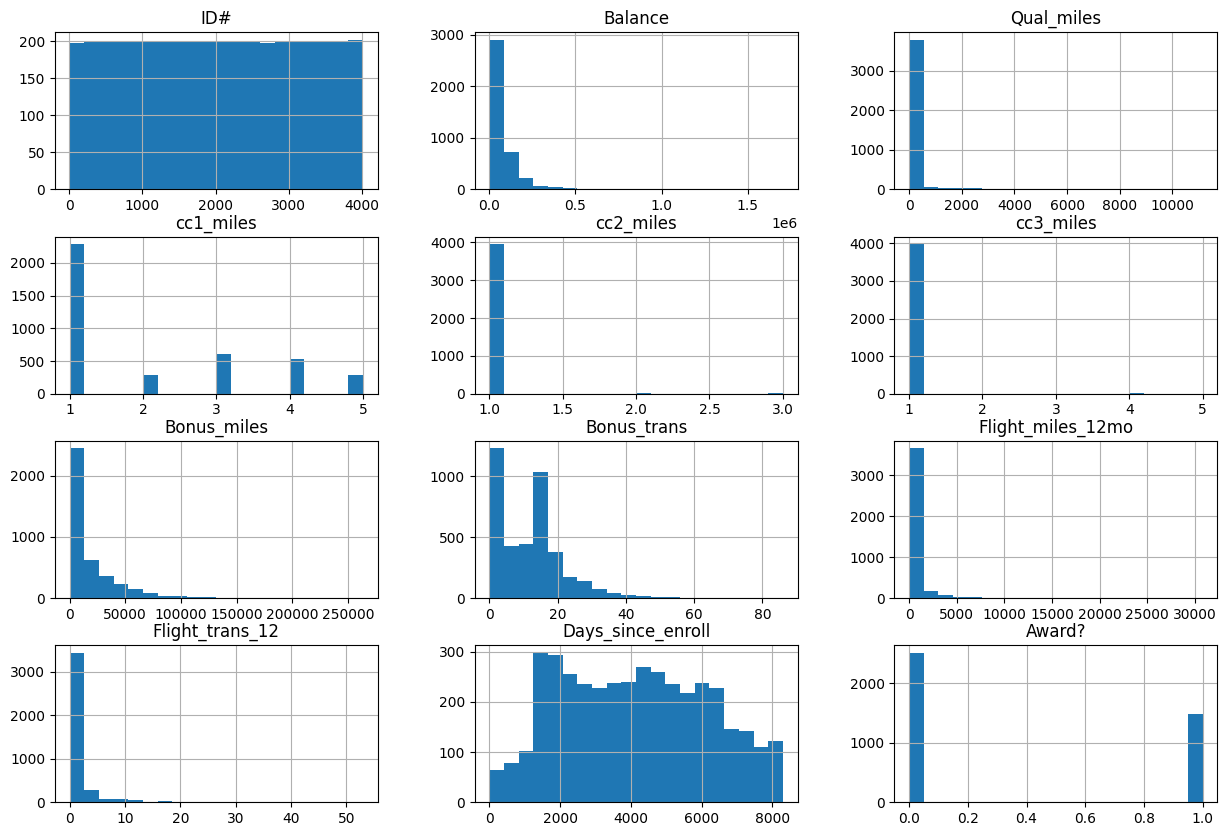

In [ ]:
import matplotlib.pyplot as plt
data_df.hist(bins=20, figsize=(15,10))
plt.show()


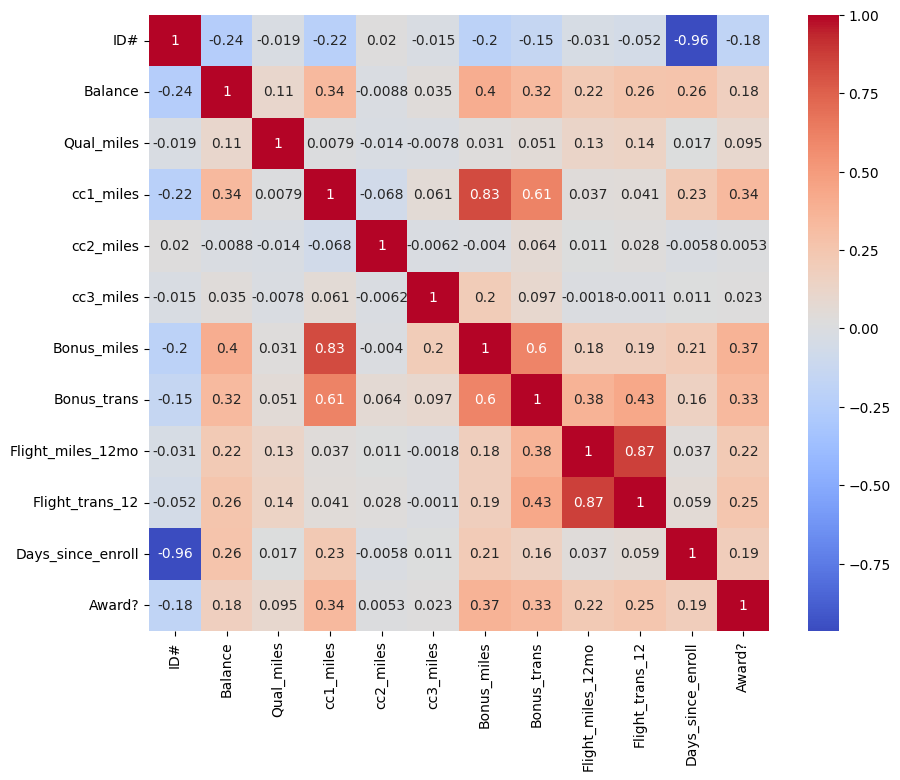

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')
plt.show()


3.Use multiple visualizations to understand the hidden patterns in the dataset


In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)


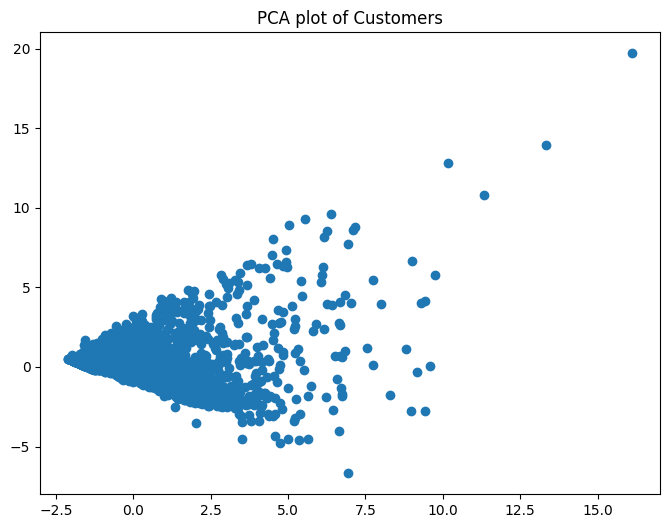

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title("PCA plot of Customers")
plt.show()


# Implementing Clustering Algorithms:

1.Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

In [ ]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

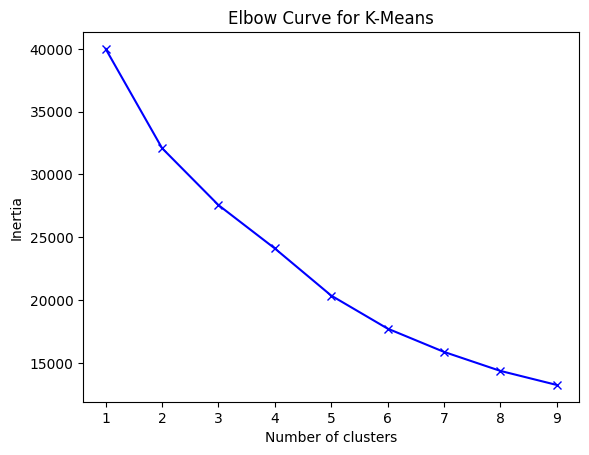

In [ ]:
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means')
plt.show()

In [76]:
print(df.isnull().sum())
print(pd.DataFrame(scaled_data).isnull().sum())

East-West Airlines is trying to learn more about its customers.  Key issues are their     0
Unnamed: 1                                                                               18
Unnamed: 2                                                                                0
Unnamed: 3                                                                               18
Unnamed: 4                                                                               18
dtype: int64
0    18
1     0
2    18
3    18
dtype: int64


In [82]:
from sklearn.impute import SimpleImputer

In [83]:
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [0 2 3]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [84]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
df['kmeans_clusters'] = kmeans.fit_predict(scaled_data_imputed)


In [70]:
kmeans_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [69]:
kmeans

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
linkage_matrix = linkage(scaled_data, method='ward')

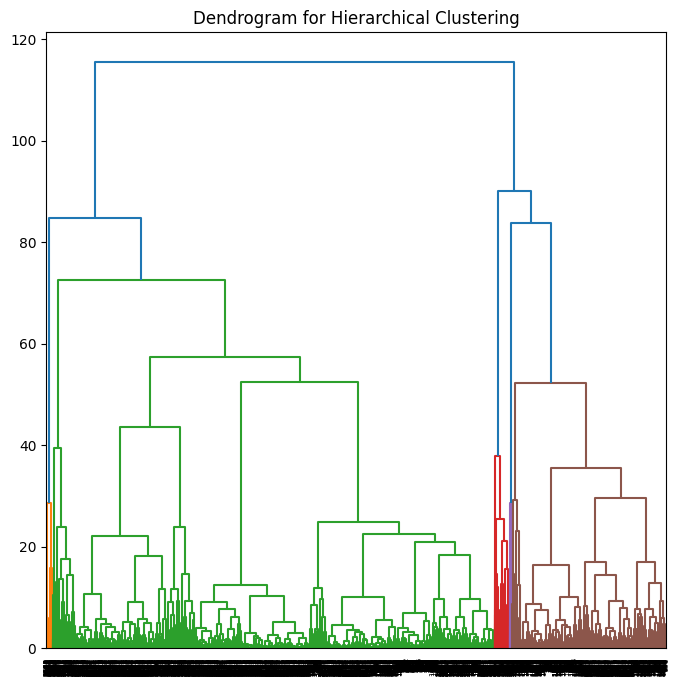

In [99]:
plt.figure(figsize=(8, 8))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

In [87]:
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
df['hierarchical_cluster'] = hierarchical.fit_predict(scaled_data_imputed)

In [88]:
hierarchical_cluster

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(scaled_data_imputed)


In [90]:
dbscan_cluster

array([0, 0, 0, ..., 5, 0, 0])

2.Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.



In [104]:
print("K-Means Cluster Counts:")
print(df['kmeans_clusters'].value_counts())

print("Hierarchical Cluster Counts:")
print(df['hierarchical_cluster'].value_counts())

print("DBSCAN Cluster Counts:")
print(df['dbscan_cluster'].value_counts())

K-Means Cluster Counts:
kmeans_clusters
1    13
2     3
0     2
Name: count, dtype: int64
Hierarchical Cluster Counts:
hierarchical_cluster
2    13
0     3
1     2
Name: count, dtype: int64
DBSCAN Cluster Counts:
dbscan_cluster
 0    13
-1     5
Name: count, dtype: int64


3.Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.




In [114]:
kmeans_silhouette = silhouette_score(scaled_data_imputed, df['kmeans_clusters'])
hierarchical_silhouette = silhouette_score(scaled_data_imputed, df['hierarchical_cluster'])
dbscan_silhouette = silhouette_score(scaled_data_imputed, df['dbscan_cluster']) if len(set(df['dbscan_cluster'])) > 1 else -1

print(f"Silhouette Score for K-Means: {kmeans_silhouette}")
print(f"Silhouette Score for Hierarchical: {hierarchical_silhouette}")
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")

Silhouette Score for K-Means: 1.0
Silhouette Score for Hierarchical: 1.0
Silhouette Score for DBSCAN: 0.6666666666666666
